In [1]:
import sys
sys.path.append("/home/amigos/seigyo/analy/shiotani/git/analy_n2data/")
import necstdb
import math
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import n2analy
import xarray as xr
from datetime import datetime
import numpy as np
from scipy.optimize import curve_fit

In [2]:
path = '/mnt/usbdisk9/data/observation/otf_planet2018/n20200320150852_12CO_2-1_otfplanet_jupiter'

In [3]:
data = n2analy.get_data(path,'03')

  0%|          | 0/3 [00:00<?, ?it/s]

read end


100%|██████████| 3/3 [00:00<00:00, 14.19it/s]

31.0 OFF 0.0 0.0
31.0 ON 0.0 0.0


In [4]:
xFFTS_Data_topics = [
    
    'ac240_spectra_data_1',
    'ac240_spectra_data_2',
]

In [5]:
def get_array(path, xFFTS_Data_topics):
    db = necstdb.opendb(path)
    xFFTS_data = db.open_table('ac240_spectra_data_1').read(astype='array')
    obsmode =  db.open_table('obsmode').read(astype='array')
    enc =  db.open_table('status_encoder').read(astype='array')
    
    spec_array = xr.DataArray(

        xFFTS_data['spec'], 
        dims=['t', 'spectral_data'], 
        coords={'t':xFFTS_data['received_time']}
    )


    obsmode_array = xr.DataArray(

        obsmode['obs_mode'],
        dims = ['t'],
        coords={'t':obsmode['received_time'], 'scan_num':('t', obsmode['scan_num'])}


    )
    
    az_array = xr.DataArray(
        
        enc['enc_az']/3600, 
        dims=['t'],
        coords={'t':enc['timestamp']}
    )
    
    el_array = xr.DataArray(
        
        enc['enc_el']/3600, 
        dims=['t'],
        coords={'t':enc['timestamp']}
    )

    return spec_array, obsmode_array, az_array, el_array

def concatenate(spec_array, obsmode_array, az_array, el_array):
    
    reindexed_obsmode_array = obsmode_array.reindex(t=spec_array['t'], method='backfill')
    reindexed_encoder_az_array = az_array.interp_like(spec_array)
    reindexed_encoder_el_array = el_array.interp_like(spec_array)
    
    del obsmode_array
    del az_array
    del el_array
    raw_array = xr.DataArray(
        np.array(spec_array),
        dims=['t', 'spectral_data'],
        coords={'t':spec_array['t'],
                
               'obsmode':('t',np.array(reindexed_obsmode_array)),
               'scan_num':('t', np.array(reindexed_obsmode_array['scan_num'])),
               'azlist':('t', np.array(reindexed_encoder_az_array)),
               'ellist':('t', np.array(reindexed_encoder_el_array))
                
               }
    )
    
    return raw_array

In [6]:
spec_array, obsmode_array, az_array, el_array = get_array(path, xFFTS_Data_topics[0])
raw_array = concatenate(spec_array, obsmode_array, az_array, el_array)

In [7]:
ON_OL = raw_array['obsmode'] == b'ON        '

In [8]:
ON = raw_array[ON_OL]

In [9]:
ON_TP = np.sum(ON,axis=1)

In [10]:
ON_TP_list = []
for i in range(31):
    ON_tpi = ON_TP['scan_num'] == i
    ON_TPi = ON_TP[ON_tpi]
    ON_TP_list.append(ON_TPi)

In [11]:
az_list = []
for i in range(len(ON_TP_list)):
    az = ON_TP_list[i]['azlist']
    az_list.append(az)

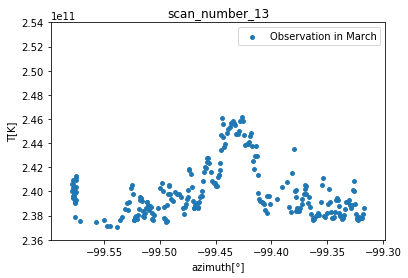

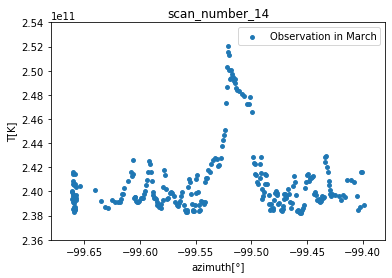

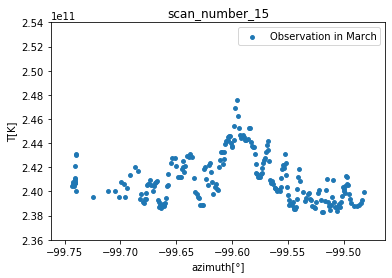

In [12]:
for i in range(3):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(az_list[i+13],ON_TP_list[i+13], s=15, label='Observation in March')
    ax.set_title('scan_number_' + f'{i+13}')
    ax.set_xlabel('azimuth[°]')
    ax.set_ylabel('T[K]')
    ax.set_ylim(2.36e11,2.54e11)
    ax.legend()
    #fig.savefig(f'/home/amigos/seigyo/analy/notebook_2020/Nishioka/per_az_2_1_ncw/az_T*_scan_number{i+13}.png')

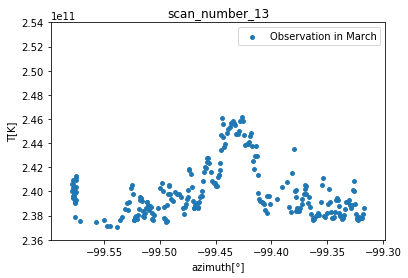

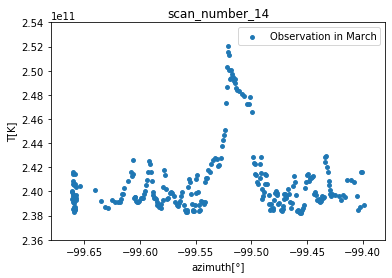

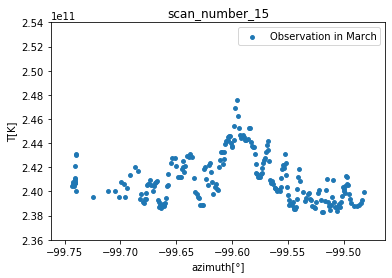

In [13]:
for i in range(3):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(az_list[i+13],ON_TP_list[i+13], s=15, label='Observation in March')
    ax.set_title('scan_number_' + f'{i+13}')
    ax.set_xlabel('azimuth[°]')
    ax.set_ylabel('T[K]')
    ax.set_ylim(2.36e11,2.54e11)
    ax.legend()
    #fig.savefig(f'/home/amigos/seigyo/analy/notebook_2020/Nishioka/per_az_2_1_ncw/az_T*_scan_number{i+13}.pdf')

In [14]:
el_list = []
for i in range(len(ON_TP_list)):
    el = ON_TP_list[i]['ellist']
    el_list.append(el)

In [15]:
el_list

[<xarray.DataArray 'ellist' (t: 239)>
 array([47.14250165, 47.14194356, 47.1414661 , 47.14111477, 47.14088678,
        47.14052653, 47.14042598, 47.14019553, 47.14001695, 47.13972659,
        47.13940853, 47.13900254, 47.1385678 , 47.13814019, 47.1378383 ,
        47.13746591, 47.13710074, 47.13662452, 47.13625246, 47.13566949,
        47.13372458, 47.13275321, 47.13187   , 47.1309342 , 47.12907203,
        47.12786476, 47.12713681, 47.12640254, 47.12587152, 47.12535235,
        47.12499153, 47.12439642, 47.12439477, 47.12410545, 47.12339539,
        47.12283664, 47.1222839 , 47.1216807 , 47.12127649, 47.12063638,
        47.12019658, 47.11957213, 47.11933916, 47.11899815, 47.11870652,
        47.11854661, 47.11844552, 47.11824218, 47.11801271, 47.11755508,
        47.11716722, 47.11681366, 47.11646115, 47.11605627, 47.11561595,
        47.1152404 , 47.11494113, 47.11458684, 47.11411275, 47.11371553,
        47.11340394, 47.1130364 , 47.11267373, 47.11225236, 47.111846  ,
        47.11

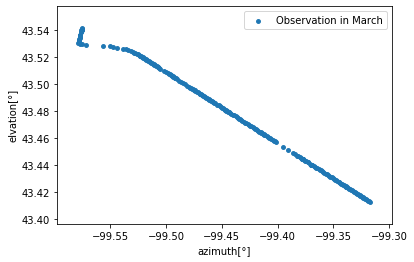

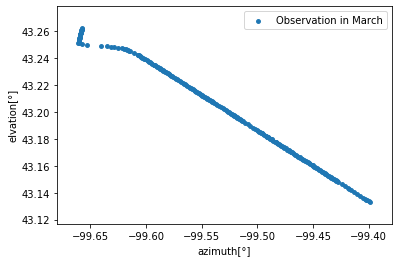

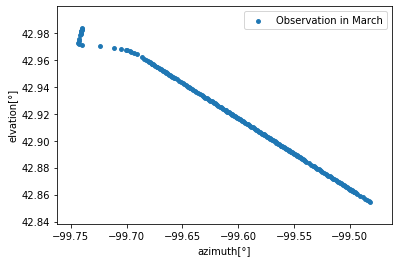

In [16]:
for i in range(3):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(az_list[i+13],el_list[i+13], s=15, label='Observation in March')
    ax.set_xlabel('azimuth[°]')
    ax.set_ylabel('elvation[°]')
    ax.legend()
    #fig.savefig(f'/home/amigos/seigyo/analy/notebook_2020/Nishioka/per_az_2_1_ncw/az_T*_scan_number{i+13}.pdf')

In [17]:
ON_TP

<xarray.DataArray (t: 7974)>
array([2.2737805e+11, 2.2789667e+11, 2.2981847e+11, ..., 2.5023440e+11,
       2.4976876e+11, 2.4833853e+11], dtype=float32)
Coordinates:
  * t         (t) float64 1.585e+09 1.585e+09 1.585e+09 ... 1.585e+09 1.585e+09
    obsmode   (t) |S12 b'ON        ' b'ON        ' ... b'ON        '
    scan_num  (t) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 30.0 30.0 30.0 30.0 30.0
    azlist    (t) float64 -98.51 -98.51 -98.51 -98.51 ... -100.7 -100.7 -100.7
    ellist    (t) float64 47.14 47.14 47.14 47.14 ... 38.72 38.72 38.72 38.72

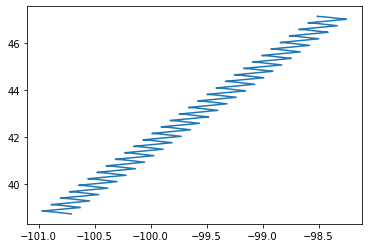

In [19]:
plt.plot(ON_TP['azlist'],ON_TP['ellist'])

In [22]:
xaz, yel = np.meshgrid(ON_TP['azlist'],ON_TP['ellist'])

In [31]:
import astropy
from astropy import coordinates as co
from astropy import time

In [32]:
co.get_body('Jupiter',time.Time.now())

<SkyCoord (GCRS: obstime=2020-10-09 11:36:32.479680, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (289.81142098, -22.62854831, 4.99365463)>